In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("Dataset//netflix1.csv")

In [6]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [14]:
data.sort_index(ascending=True, inplace=True)

In [46]:
data.set_index("show_id", inplace=True)

In [52]:
data.shape

(8787, 9)

In [47]:
data.index = range(1, len(data) + 1)


In [48]:
data.index.name = 'Show-Id'

In [51]:
data.drop_duplicates(subset="title", inplace=True)

In [49]:
data.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
Show-Id,,,,,,,,,
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
2,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
4,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
5,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [58]:
counts = data['type'].value_counts()


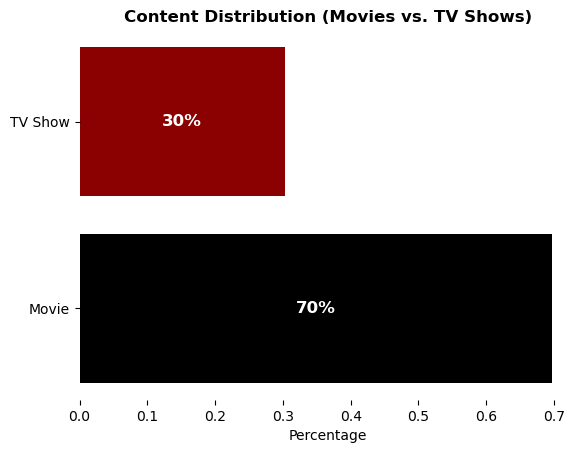

In [86]:
#calculate percentage
percentages = counts / counts.sum()

#plot horizontal bars
plt.barh(counts.index, percentages, color=['black', 'darkred'])


# Add percentage labels inside bars
for i, (value, label) in enumerate(zip(percentages, counts.index)):
    plt.text(value / 2, i, f'{value:.0%}', color='white', ha='center', va='center', fontsize=12, fontweight='bold')
    
plt.xlabel('Percentage')
plt.title('Content Distribution (Movies vs. TV Shows)', fontsize=12, fontweight='bold')
# Remove borders for a clean look
plt.box(False)
plt.show()

In [ ]:
# Get top 10 countries by total count
d2 =data['country'].value_counts().nlargest(10).index



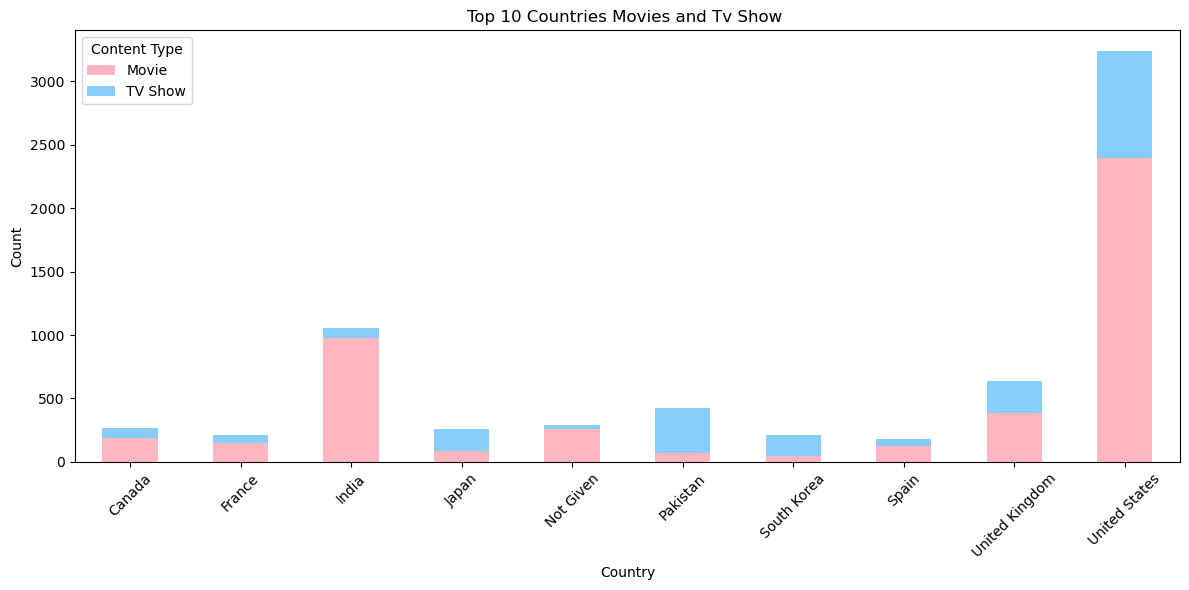

In [103]:
# Filter the dataframe
df = data[data['country'].isin(d2)]

# Create a pivot table: rows = countries, columns = type, values = counts
df_pivot_table = df.pivot_table(index='country', 
                                        columns='type', 
                                        aggfunc='size', 
                                        fill_value=0)

# Plot stacked bar chart
ax = df_pivot_table.plot(kind='bar', stacked=True, figsize=(12,6), color=['#FFB6C1', '#87CEFA'])


plt.title("Top 10 Countries Movies and Tv Show ")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()


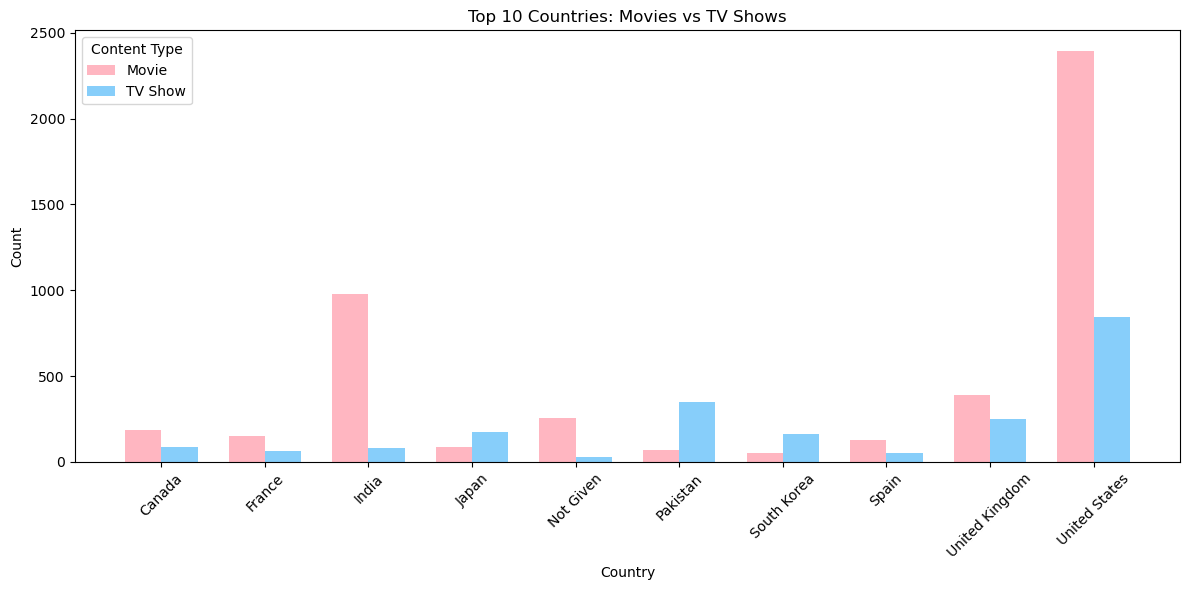

In [104]:
countries = df_pivot_table.index
x = np.arange(len(countries))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x - width/2, df_pivot_table['Movie'], width, label='Movie', color='#FFB6C1')
ax.bar(x + width/2, df_pivot_table['TV Show'], width, label='TV Show', color='#87CEFA')

ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45)
ax.set_xlabel("Country")
ax.set_ylabel("Count")
ax.set_title("Top 10 Countries: Movies vs TV Shows")
ax.legend(title='Content Type')
plt.tight_layout()
plt.show()

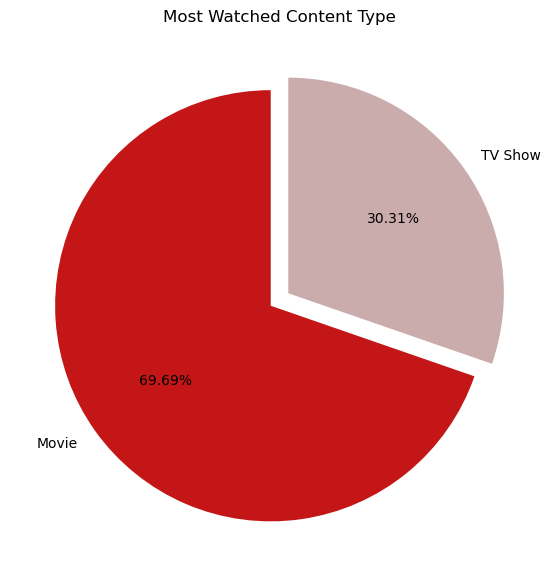

In [129]:
type_counts = data['type'].value_counts()  # Movie vs TV Show

# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    type_counts, 
    labels=type_counts.index, 
    autopct='%1.2f%%',  # shows percentage
    colors=["#c41616", "#CBACAC"],  # nice pastel colors
    startangle=90,
    explode=[0.05, 0.05]  # slightly separate slices
)
plt.title("Most Watched Content Type")
plt.show()